<img src="files/ivyivy.png" />

# Video Game Sales Data Analysis - Team Ivysaur
## Group Members:
### Mert Uyğur - 201180753
### Umut Can Demirkaynak - 181180022
### Muhammed Murat Göktaş - 171180029

***

## Importing necessary libraries and data

In [1]:
import sys
sys.path.append('../src')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


from vgs.config import vgsales

 ***

## Overview and Some Data Cleaning 

In [2]:
vgsales.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

#### Dropping Rank columns which serves nothing

In [3]:
vgsales.drop(columns="Rank",inplace=True)

In [4]:
vgsales.isnull().values.any()

True

#### Detecting how many missing values and which

In [5]:
null_columns = vgsales.columns[vgsales.isnull().any()]
vgsales[null_columns].isnull().sum()

Year         271
Publisher     58
dtype: int64

 #### Dropping null values since it is not much and will not effect our 

In [6]:
vgsales = vgsales.dropna()

In [7]:
vgsales.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### There was an incomplete value of game in 2020 distracting our dataset, we removed values after year 2017.

In [8]:
vgsales = vgsales[vgsales["Year"]<2017.0]

In [9]:
vgsales.shape

(16287, 10)

 ***
# Explotary Data Analysis

***

### Platforms

#### How many different platforms?

In [10]:
vgsales['Platform'].nunique()

31

#### The amount of games the platforms released between 1980-2016 

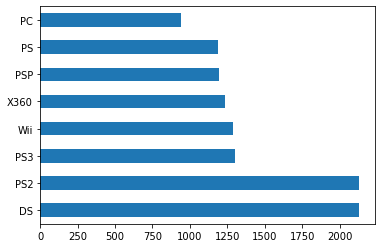

In [11]:
vgsales['Platform'].value_counts()[:8].plot(kind="barh");

<img src="files/ds.jpg">

#### Platforms that have the most global sales amount also by region

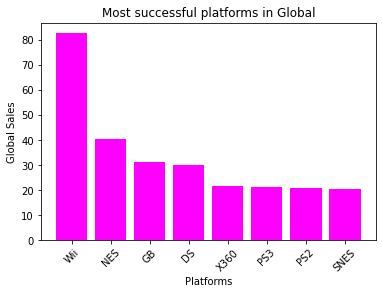

In [12]:
plt.bar(data=vgsales.head(20), x='Platform', height='Global_Sales', color = 'magenta')
plt.xticks(rotation=45)
plt.xlabel('Platforms')
plt.ylabel('Global Sales')
plt.title('Most successful platforms in Global')
plt.show()

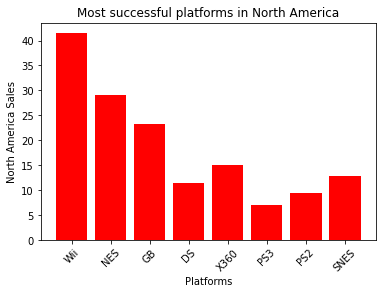

In [13]:
plt.bar(data=vgsales.head(20), x='Platform', height='NA_Sales', color = 'red')
plt.xticks(rotation=45)
plt.xlabel('Platforms')
plt.ylabel('North America Sales')
plt.title('Most successful platforms in North America')
plt.show()

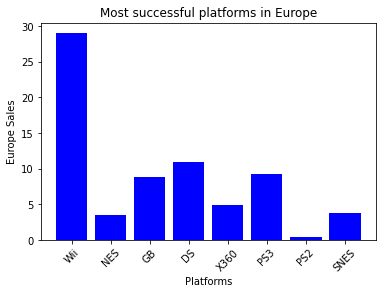

In [14]:
plt.bar(data=vgsales.head(20), x='Platform', height='EU_Sales', color = 'blue')
plt.xticks(rotation=45)
plt.xlabel('Platforms')
plt.ylabel('Europe Sales')
plt.title('Most successful platforms in Europe')
plt.show()

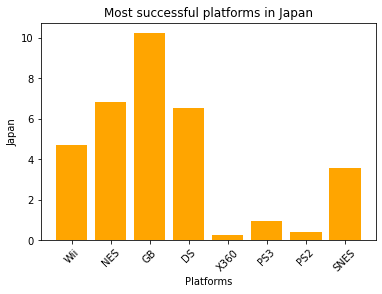

In [15]:
plt.bar(data=vgsales.head(20), x='Platform', height='JP_Sales', color = 'orange')
plt.xticks(rotation=45)
plt.xlabel('Platforms')
plt.ylabel('Japan')
plt.title('Most successful platforms in Japan')
plt.show()

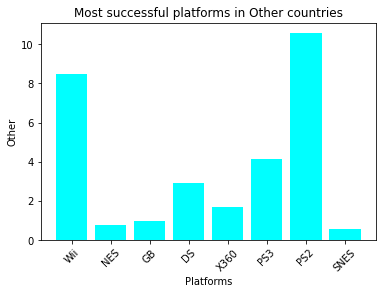

In [16]:
plt.bar(data=vgsales.head(20), x='Platform', height='Other_Sales', color = 'cyan')
plt.xticks(rotation=45)
plt.xlabel('Platforms')
plt.ylabel('Other')
plt.title('Most successful platforms in Other countries')
plt.show()

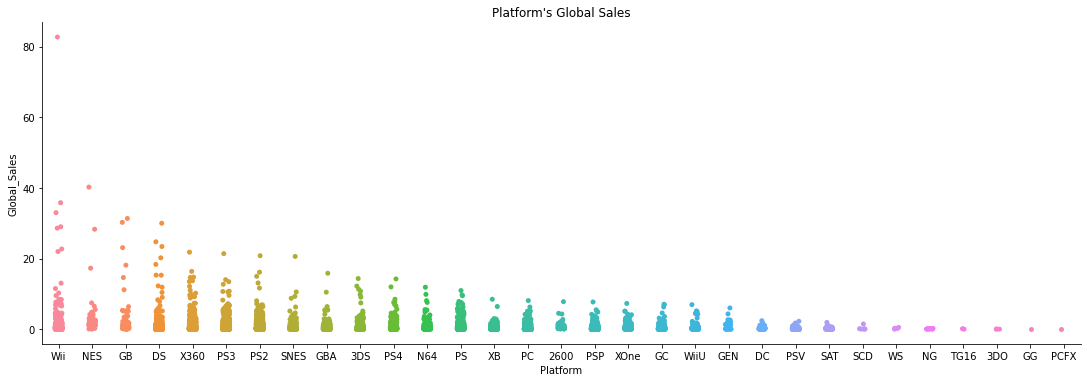

In [17]:
sns.catplot(x='Platform', y='Global_Sales', data=vgsales, height=5, aspect=3)
plt.gca().set_title('Platform\'s Global Sales');

### Publishers

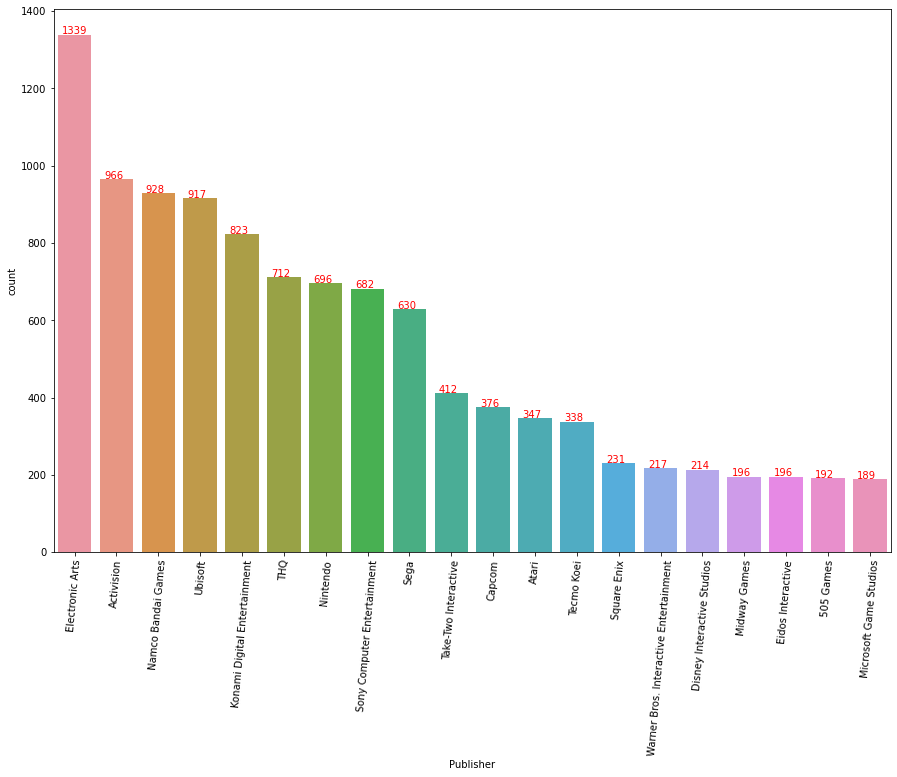

In [18]:
publishers = vgsales.groupby(by=['Publisher'])['Year'].count().sort_values(ascending=False).head(20)
publishers = pd.DataFrame(publishers).reset_index()
plt.figure(figsize=(15, 10))
ax=sns.countplot(x="Publisher", data=vgsales, order = vgsales.groupby(by=['Publisher'])['Year'].count().sort_values(ascending=False).iloc[:20].index)
plt.xticks(rotation=85)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.10, p.get_height()+1),color= 'red')

### Games

In [19]:
vgsales['Name'].nunique()

11322

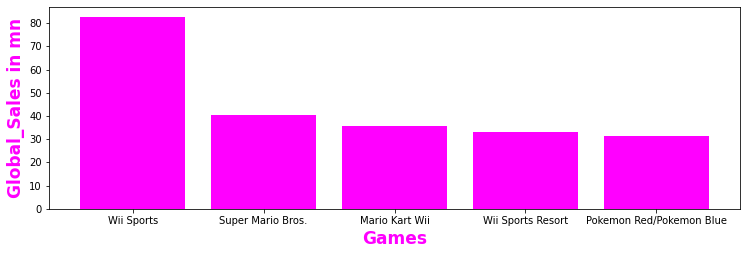

In [20]:
height = vgsales['Global_Sales'][:5]
bars = vgsales['Name'][:5]
plt.bar(bars, height, color='magenta')
plt.subplots_adjust(left=-0.7, bottom=0.1, right=0.9, top=0.8)
# Custom Axis title
plt.xlabel('Games', fontweight='bold', color = 'magenta', fontsize='17', horizontalalignment='center');
plt.ylabel('Global_Sales in mn', fontweight='bold', color='magenta', fontsize='17');

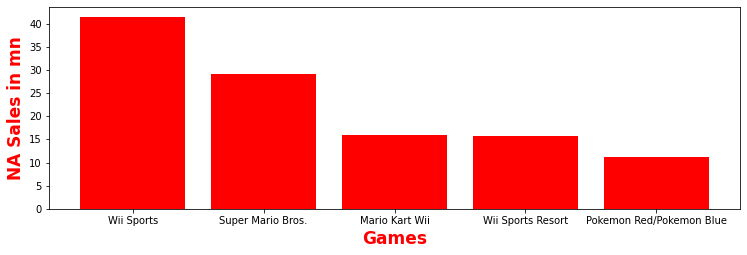

In [21]:
height = vgsales['NA_Sales'][:5]
bars = vgsales['Name'][:5]
plt.bar(bars, height, color='red')
plt.subplots_adjust(left=-0.7, bottom=0.1, right=0.9, top=0.8)
# Custom Axis title
plt.xlabel('Games', fontweight='bold', color = 'red', fontsize='17', horizontalalignment='center');
plt.ylabel('NA Sales in mn', fontweight='bold', color='red', fontsize='17');

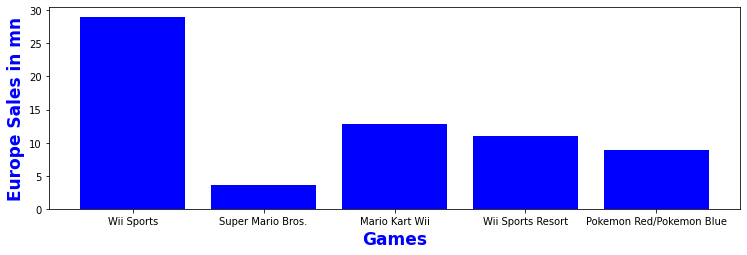

In [22]:
height = vgsales['EU_Sales'][:5]
bars = vgsales['Name'][:5]
plt.bar(bars, height, color='blue')
plt.subplots_adjust(left=-0.7, bottom=0.1, right=0.9, top=0.8)
# Custom Axis title
plt.xlabel('Games', fontweight='bold', color = 'blue', fontsize='17', horizontalalignment='center');
plt.ylabel('Europe Sales in mn', fontweight='bold', color='blue', fontsize='17');

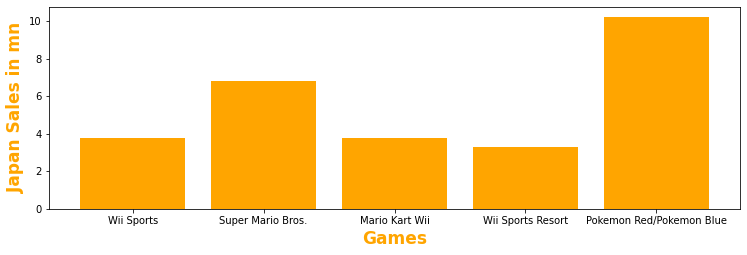

In [23]:
height = vgsales['JP_Sales'][:5]
bars = vgsales['Name'][:5]
plt.bar(bars, height, color='orange')
plt.subplots_adjust(left=-0.7, bottom=0.1, right=0.9, top=0.8)
# Custom Axis title
plt.xlabel('Games', fontweight='bold', color = 'orange', fontsize='17', horizontalalignment='center');
plt.ylabel('Japan Sales in mn', fontweight='bold', color='orange', fontsize='17');

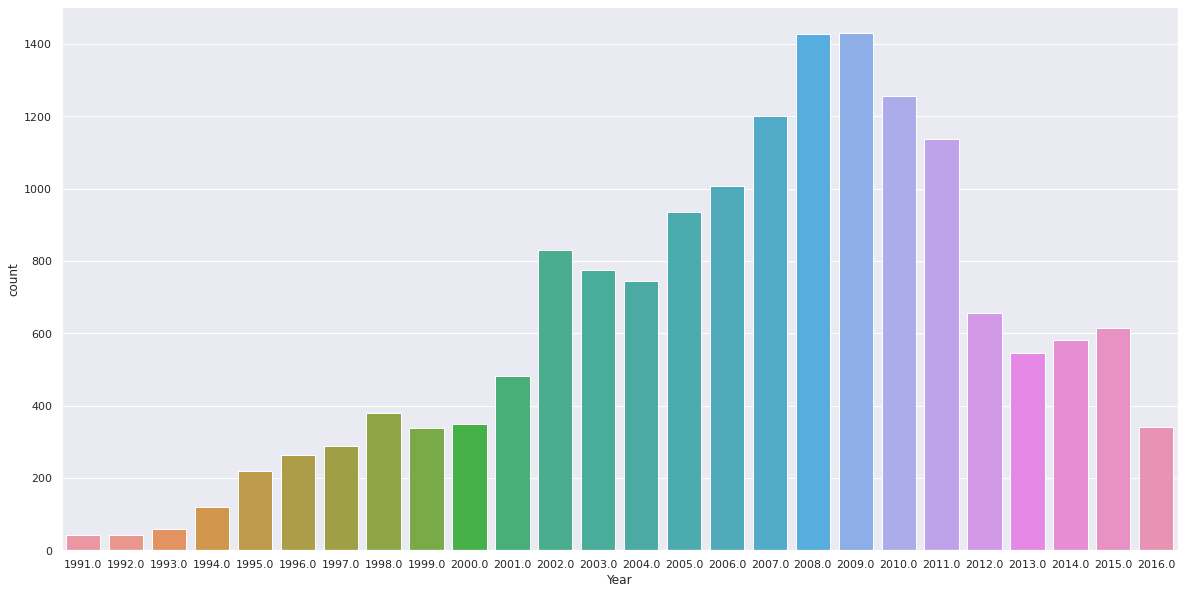

In [24]:
data_thrty = vgsales[vgsales.Year >1990]

# We will be inspecting the games released after 1990 in this dataset.
sns.set(rc={"font.style":"normal",
            "text.color":"black",
            "xtick.color":"black",
            "ytick.color":"black",
            "axes.labelcolor":"black",
            "axes.grid":False,
            'axes.labelsize':20,
            'figure.figsize':(20.0, 10.0),
            'xtick.labelsize':20,
            'ytick.labelsize':30})

sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Year", data=data_thrty)

### Genre

#### Global sales per Genre

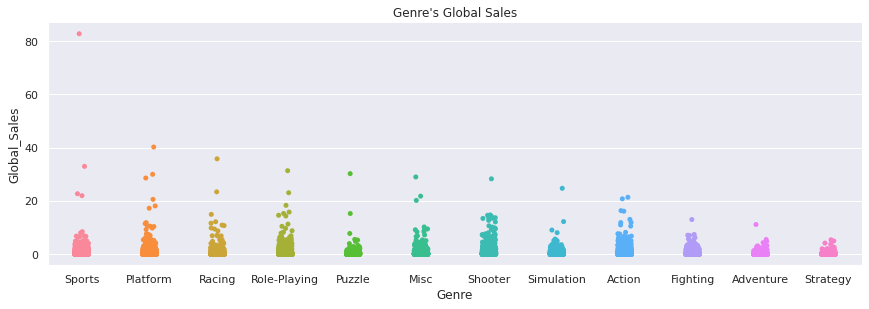

In [25]:
sns.catplot(x='Genre', y='Global_Sales', data=vgsales, height=4, aspect=3)
plt.gca().set_title('Genre\'s Global Sales');

In [26]:
vgsales[vgsales['Global_Sales']>60]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


#### Amount of games filtered by genre

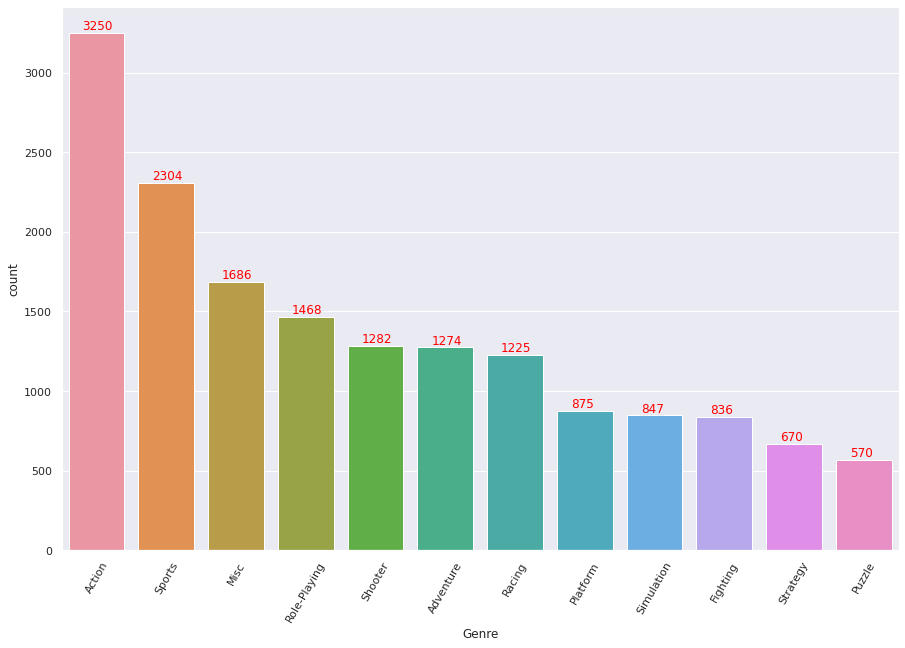

In [27]:
plt.figure(figsize=(15, 10))
ax=sns.countplot(x="Genre", data=vgsales, order = vgsales['Genre'].value_counts().index)
plt.xticks(rotation=60)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()+0.20, p.get_height()+2), va='bottom',color= 'red')
plt.show();

#### Amoung of games showed as graphics and percentages

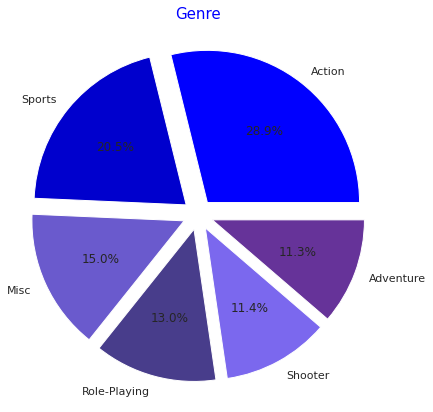

In [28]:
x=vgsales.Genre.value_counts()[0:6]
sizes=x.values
labels=x.index
explode=[0,0,0,0,0,0]
colors=["blue","mediumblue","slateblue","darkslateblue","mediumslateblue","rebeccapurple"]
plt.figure(figsize=(7,7))
plt.pie(sizes,explode=[0.1]*6,labels=labels,colors=colors,autopct='%1.1f%%')
plt.title('Genre',color = 'blue',fontsize = 15);

### Sales

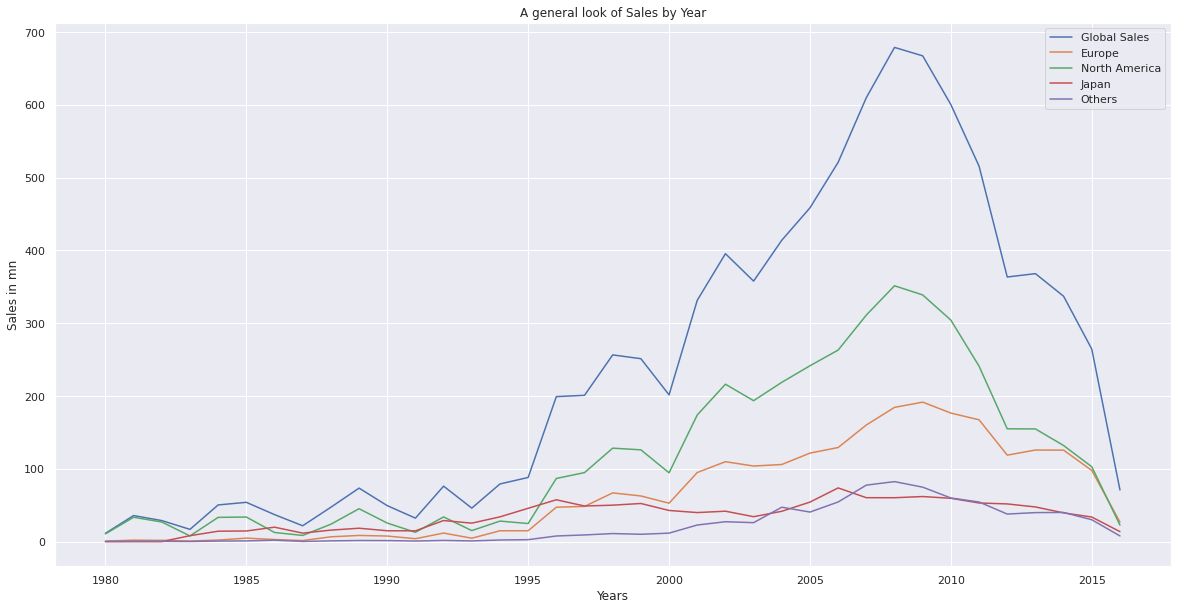

In [29]:
Global_Sales_Evolution  = vgsales.pivot_table(index = 'Year' ,values = 'Global_Sales',aggfunc = np.sum)
sns.lineplot(x=Global_Sales_Evolution.index,y=Global_Sales_Evolution['Global_Sales'])

#EU Sales Evolution 

EU_Sales_Evolution  = vgsales.pivot_table(index = 'Year' ,values = 'EU_Sales',aggfunc = np.sum)
sns.lineplot(x=EU_Sales_Evolution.index,y=EU_Sales_Evolution['EU_Sales'])

#NA Sales Evolution 

NA_Sales_Evolution  = vgsales.pivot_table(index = 'Year' ,values = 'NA_Sales',aggfunc = np.sum)
sns.lineplot(x=NA_Sales_Evolution.index,y=NA_Sales_Evolution['NA_Sales'])

#JP Sales Evolution 

JP_Sales_Evolution  = vgsales.pivot_table(index = 'Year' ,values = 'JP_Sales',aggfunc = np.sum)
sns.lineplot(x=JP_Sales_Evolution.index,y=JP_Sales_Evolution['JP_Sales'])

#Other Sales Evolution 

O_Sales_Evolution  = vgsales.pivot_table(index = 'Year' ,values = 'Other_Sales',aggfunc = np.sum)
sns.lineplot(x=O_Sales_Evolution.index,y=O_Sales_Evolution['Other_Sales'])

plt.rcParams['figure.figsize'] = (15,15)
plt.legend(loc='upper right', labels=['Global Sales', 'Europe', 'North America', 'Japan', 'Others'])
plt.title("A general look of Sales by Year")
plt.ylabel("Sales in mn")
plt.xlabel("Years")
plt.show()

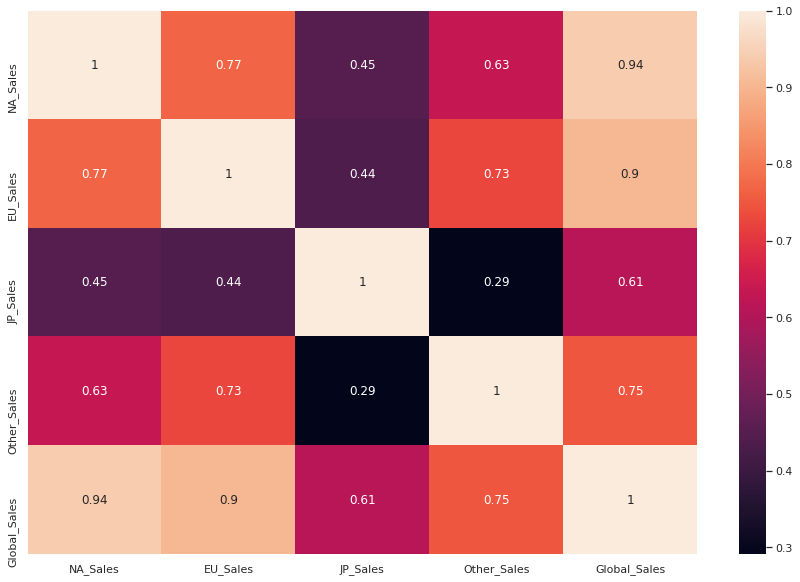

In [30]:
vgdropped = vgsales.drop(columns='Year')
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(vgdropped.corr(), annot = True,);

### Prediction

### We will be building regression models and producing graphs with sales values and regions.

#### In order to compare, our global sales

In [31]:
vgsales.iloc[:,-1] ## Our global sales

0        82.74
1        40.24
2        35.82
3        33.00
4        31.37
         ...  
16593     0.01
16594     0.01
16595     0.01
16596     0.01
16597     0.01
Name: Global_Sales, Length: 16287, dtype: float64

In [32]:
X = vgsales.iloc[:,5:9]
y = vgsales.iloc[:,-1] ## Parting our data. We will be working on region based sales against global sales.

In [33]:
y

0        82.74
1        40.24
2        35.82
3        33.00
4        31.37
         ...  
16593     0.01
16594     0.01
16595     0.01
16596     0.01
16597     0.01
Name: Global_Sales, Length: 16287, dtype: float64

## Linear Regression

### We will be inspecting NA and Japan values for simplicity sake :)

### North America

In [34]:
X = vgsales.iloc[:,5:6] ## Taking NA sales into stage.

In [35]:
from sklearn import linear_model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test) ## We designed model after setting our X for NA values.

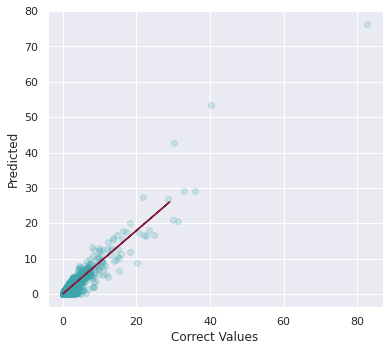

In [43]:
plt.figure(figsize=(6,12))

plt.subplot(2, 1, 1)
plt.scatter(x=y_train, y=y_pred_train, c="#3da4ab", alpha=0.2)

p = np.poly1d(a)
a = np.polyfit(y_train, y_pred_train, 1)
plt.plot(y_test,p(y_test),"#851e3e")
plt.xlabel('Correct Values')
plt.ylabel('Predicted')
plt.show(); ## Graphing our NA_Sales and Global Sales Prediction graph.

### Japan

In [44]:
X = vgsales.iloc[:,7:8] ## Taking JP sales into stage.

In [45]:
X

,JP_Sales
0,3.77
1,6.81
2,3.79
3,3.28
4,10.22
...,...
16593,0.00
16594,0.00
16595,0.00
16596,0.00


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test) ## Splitting our set after setting JP_Sales into stage

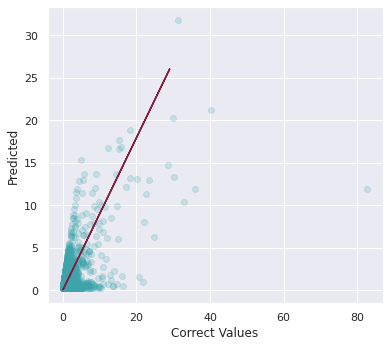

In [47]:
plt.figure(figsize=(6,12))

plt.subplot(2, 1, 1)
plt.scatter(x=y_train, y=y_pred_train, c="#3da4ab", alpha=0.2)

p = np.poly1d(a)
a = np.polyfit(y_train, y_pred_train, 1)
plt.plot(y_test,p(y_test),"#851e3e")
plt.xlabel('Correct Values')
plt.ylabel('Predicted')
plt.show() ## Graphing our JP_Sales Predictions.

#### In project, we have used multiple regression models

#### Linear Regression Accuracy Calculation for North America

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

X = vgsales.iloc[:,5:6] ## Taking NA sales into stage.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

lr = LinearRegression()
lr = lr.fit(X_train, y_train)

y_predlr = lr.predict(X_test)
print("Training Accuracy :", lr.score(X_train, y_train))
print("Testing Accuracy :", lr.score(X_test, y_test))
print(r2_score(y_test,y_predlr))

Training Accuracy : 0.8951500821541934
Testing Accuracy : 0.8373402660947679
0.8373402660947679


#### Linear Regression Accuracy Calculation for Japan

In [49]:
X = vgsales.iloc[:,7:8] ## Taking JP sales into stage.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

lr = LinearRegression()
lr = lr.fit(X_train, y_train)

y_predlr = lr.predict(X_test)
print("Training Accuracy :", lr.score(X_train, y_train))
print("Testing Accuracy :", lr.score(X_test, y_test))
print(r2_score(y_test,y_predlr))

Training Accuracy : 0.3822641566649255
Testing Accuracy : 0.3417874060126249
0.3417874060126249


#### Linear Regression Accuracy Calculation for Europe

In [50]:
X = vgsales.iloc[:,6:7] ## Taking EU sales into stage.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

lr = LinearRegression()
lr = lr.fit(X_train, y_train)

y_predlr = lr.predict(X_test)
print("Training Accuracy :", lr.score(X_train, y_train))
print("Testing Accuracy :", lr.score(X_test, y_test))
print(r2_score(y_test,y_predlr))

Training Accuracy : 0.8280545518042903
Testing Accuracy : 0.755336435980043
0.755336435980043


## Random Forest Regression Model

#### Random Forest Regression for North America

In [51]:
from sklearn.ensemble import RandomForestRegressor

X = vgsales.iloc[:,5:6] ## Taking NA sales into stage.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

rfr = RandomForestRegressor(n_estimators = 10, random_state = 0)
rfr.fit(X_train, y_train)
y_predrfr = rfr.predict(X_test)
print("Training Accuracy :", rfr.score(X_train, y_train))
print("Testing Accuracy :", rfr.score(X_test, y_test))
print(r2_score(y_test,y_predrfr))

Training Accuracy : 0.9383917047353844
Testing Accuracy : 0.8424539608898256
0.8424539608898256


#### Random Forest Regression for Japan

In [52]:
X = vgsales.iloc[:,7:8]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

rfr = RandomForestRegressor(n_estimators = 10, random_state = 0)
rfr.fit(X_train, y_train)
y_predrfr = rfr.predict(X_test)
print("Training Accuracy :", rfr.score(X_train, y_train))
print("Testing Accuracy :", rfr.score(X_test, y_test))
print(r2_score(y_test,y_predrfr))

Training Accuracy : 0.541536197818083
Testing Accuracy : 0.2850176896888509
0.2850176896888509


#### Random Forest Regression for Europe


In [53]:
from sklearn.ensemble import RandomForestRegressor

X = vgsales.iloc[:,6:7] ## Taking EU sales into stage.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

rfr = RandomForestRegressor(n_estimators = 10, random_state = 0)
rfr.fit(X_train, y_train)
y_predrfr = rfr.predict(X_test)
print("Training Accuracy :", rfr.score(X_train, y_train))
print("Testing Accuracy :", rfr.score(X_test, y_test))
print(r2_score(y_test,y_predrfr))

Training Accuracy : 0.8854189430953356
Testing Accuracy : 0.6911661731321145
0.6911661731321145


## Ridge Regression Model

#### Ridge Regression for North America

In [54]:
from sklearn.linear_model import Ridge
X = vgsales.iloc[:,5:6] ## Taking NA sales into stage.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

r = Ridge()
r = r.fit(X_train,y_train)
y_predr = r.predict(X_test)
print("Training Accuracy :", r.score(X_train, y_train))
print("Testing Accuracy :", r.score(X_test, y_test))
print(r2_score(y_test,y_predr))

Training Accuracy : 0.8951500706885547
Testing Accuracy : 0.8373699225693387
0.8373699225693387


#### Ridge Regression for Japan

In [55]:
X = vgsales.iloc[:,7:8] ## Taking NA sales into stage.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

r = Ridge()
r = r.fit(X_train,y_train)
y_predr = r.predict(X_test)
print("Training Accuracy :", r.score(X_train, y_train))
print("Testing Accuracy :", r.score(X_test, y_test))
print(r2_score(y_test,y_predr))

Training Accuracy : 0.3822639448186439
Testing Accuracy : 0.3417879771328324
0.3417879771328324


#### Ridge Regression for Europe

In [56]:
X = vgsales.iloc[:,6:7] ## Taking EU sales into stage.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

r = Ridge()
r = r.fit(X_train,y_train)
y_predr = r.predict(X_test)
print("Training Accuracy :", r.score(X_train, y_train))
print("Testing Accuracy :", r.score(X_test, y_test))
print(r2_score(y_test,y_predr))

Training Accuracy : 0.8280544860586367
Testing Accuracy : 0.7553449659199418
0.7553449659199418


## So in 2021, when it comes to games, it has a great potential. New AAA games have a great community waiting for them.
## People are waiting 9 years just for a games. As the world changes, many industries be effected by this change.
## But there is one industry that never will be effected by any kind of threat, virus or whatsoever, Game Industry. Stay healthy.

<img src="files/amung.jpg" />